# STAT207 Final Project - Investigating Biodiversity of Penguins at Palmer Station

Karena Liang, Ken Ogata, Trishla Nair

## 1. Introduction

One of the most common places to find penguins is within Antarctica. But for a long time now, penguins have been classified as an endangered species. To bring awareness upon penguin endangerment, we can analyze data about three specific penguin species: the Gentoo, the Adelie, and the Chinstrap penguins. The chosen data was collected through a study conducted in the islands of the Palmer Archipelago, Antarctica, from 2007 to 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. We will be analyzing the data with the following questions in mind:
1. How does the relationship between species and flipper length change over time? 
2. Is there a statistically significant difference between the flipper lengths of Adelie penguins in 2007 versus 2009?
3. How well can we predict the body mass of penguins based on their bill length, bill depth, flipper length, and sex using linear regression?
4. Could we create a model in which body mass, species, and other possible factors predict penguin sex?
Our research may be of interest to those who are passionate about wildlife conservation and environmental sustainability efforts. By analyzing the data, we can gain possible insight into species diversity, habitat security, population trends, etc. in order to better understand the current state.


In [1]:
#Package Imports
import pandas as pd
from scipy.stats import t
from scipy.stats import f
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("penguins.csv")
df.dropna(inplace=True)
df.drop('rowid', axis=1, inplace=True)
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007


In [3]:
df.shape

(333, 8)

Regarding other considerations, we acknowledge limitations such as the recency of the data - the data was collected over a decade ago, thus it may or may not be completely accurate when applied to the current situation. The study was done as ethically as possible in the way that the penguins were not harmed, but it was still ethically harmful in terms of the invasive nature of the sampling. The study description includes that study nests were individually marked and chosen before the onset of egg laying to consistent monitor and sample for blood. 
After handling, the individuals were further monitored to ensure the pair reached clutch completion, i.e., two eggs. The species were represented equally as possible, but there will always be varying environmental factors; the study had a reduced sample size for chinstraps due to overall smaller number of individuals breeding at rookeries on Dream Island.

## 2. Descriptive Analytics

### How does the relationship between species and flipper length change over time?

Text(0, 0.5, 'Flipper length')

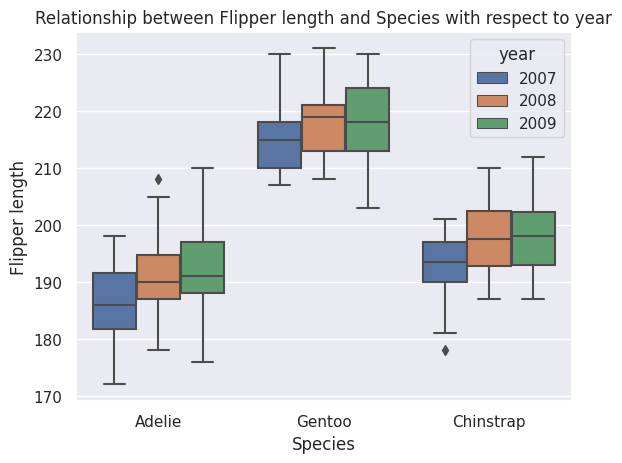

In [4]:
sns.boxplot(x = "species", y= "flipper_length_mm", hue = "year", data = df)
plt.title("Relationship between Flipper length and Species with respect to year")
plt.xlabel("Species")
plt.ylabel("Flipper length")

<u>**Conclusion - Descriptive Analytics**</u><br>

Looking at the relationship between species and flipper length with respect to time, the Adelie penguins exhibit the most fluctuations, with the range of flipper length changing every year. The median flipper length of the Adelies increases from 186mm to 190mm to finally 191mm. The Gentoo penguins exhibit similar fluctuations, but roughly stay the same. The median flipper length for these penguins changes from 215mm, 219mm, and 218mm in the three-year time span. Similar to the Gentoo penguins, the Chinstrap penguins also experience fluctuations that are not as drastic as the Adelies, with the flipper length of Chinstraps changing from 193m, 197mm, and 198mm in the three years.

Comparing the three species, we can conclude that the Gentoo penguins had the largest median flipper length, with the Chinstraps having the second largest median flipper length and the Adelies having the smallest.

The comparison of the medians between the three species allows us to visualize the changes that occurred in the penguin populations over the span of three years. While the differences in yearly medians could be the result of chance variation, there is the chance that there has been a statistically significant change in the population. This can be further explored through inference analysis in the next section.


## 3. Inference

### Is there a statistically significant difference between the flipper lengths of Adelie penguins in 2007 versus 2009?

<u>**Hypothesis Testing Assumptions**</u><br>
We will use a two sample t test, using the difference of mean flipper lengths of Adelie penguins in 2007 and 2009, at the a = 0.05 significance level.

H₀: µ ₂₀₀₇  = µ ₂₀₀₉
H<sub>a</sub>:  µ ₂₀₀₇  ≠  µ ₂₀₀₉


In [5]:
adelie = df[df.species == "Adelie"]
print("2007 Adelie sample size: ", len(adelie[adelie.year == 2007]))
print("2009 Adelie sample size: ", len(adelie[adelie.year == 2009]))

2007 Adelie sample size:  44
2009 Adelie sample size:  52


The published journal where the data is from states that both samples of the Adelie penguins were randomly selected. Additionally, the current Adelie population is estimated to be around 1,200, which makes our samples of size 52 and 44 less than 10% of the population, passing our independence checks.

Text(0.5, 0, 'Flipper length (mm)')

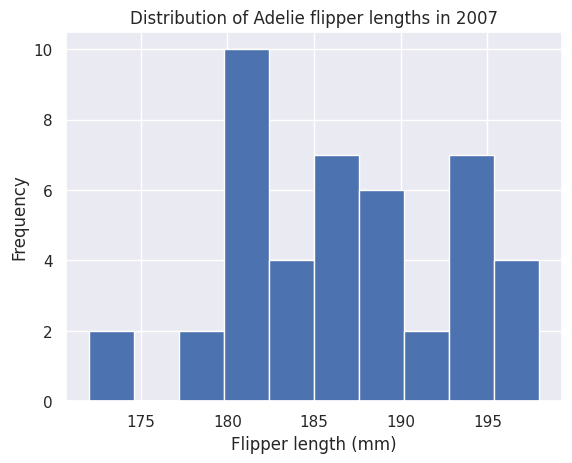

In [6]:
adelie = df[df.species == "Adelie"]
adelie[adelie.year == 2007].flipper_length_mm.hist()
plt.title("Distribution of Adelie flipper lengths in 2007")
plt.ylabel("Frequency")
plt.xlabel("Flipper length (mm)")

Text(0.5, 0, 'Flipper length (mm)')

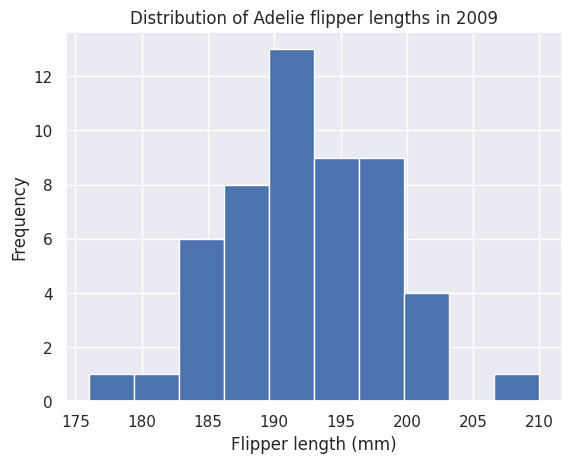

In [7]:
adelie[adelie.year == 2009].flipper_length_mm.hist()
plt.title("Distribution of Adelie flipper lengths in 2009")
plt.ylabel("Frequency")
plt.xlabel("Flipper length (mm)")

While the distributions themselves are not normally distributed, we can guarantee that the underlying sampling distribution means for both the 2007 and 2009 populations to be approximately normally distributed, because the respective sample sizes for both samples are greater than 30.

In [8]:
print("2007 Adelie flipper length standard deviation: ", adelie[adelie.year == 2007].std().flipper_length_mm)
print("2009 Adelie flipper length standard deviation: ", adelie[adelie.year == 2009].std().flipper_length_mm)

2007 Adelie flipper length standard deviation:  6.5577206244688035
2009 Adelie flipper length standard deviation:  6.217767564340347


In [9]:
print("2007 Adelie mean flipper length: ", adelie[adelie.year == 2007].mean().flipper_length_mm)
print("2009 Adelie mean flipper length: ", adelie[adelie.year == 2009].mean().flipper_length_mm)

2007 Adelie mean flipper length:  186.70454545454547
2009 Adelie mean flipper length:  192.07692307692307


In [10]:
stat = (192.0769 - 186.7045) / ((((6.5577 ** 2) / 44) + ((6.2178 ** 2) / 52)) ** 0.5)
print("t: ", stat)

t:  4.095426023736482


In [11]:
print("p-value: ", 2 * (1 - t.cdf(np.abs(stat), df = 43)))

p-value:  0.00018255047301884986


<u>**Test Analysis and Conclusion**</u><br>

Since the p-value of 0.00018255 is lower than our selected alpha of 0.05, we reject the null hypothesis. There is sufficient evidence that the mean flipper length between the 2007 Adelie population is the different from the 2009 Adelie population. While we cannot make any conclusions as to the causes for this difference in mean flipper length, we can conclude that the two populations are characteristically different by a statistically significant margin. Possible explanations for this change could be the original 2007 penguins growing up, the introduction of new genes and members of the population through migration/gene flow, or a bottleneck event causing drastic changes in the gene pool. 


## 4. Linear Regression

### How well can we predict the body mass of penguins based on their bill length, bill depth, flipper length, and sex using linear regression?

We will consider the following assumptions to proceed with multiple linear regression.

In [12]:
linMod = smf.ols('body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + sex', data=df).fit()
print(linMod.summary())
print("-----------")
print("Our Fitted Linear Regression Model: ")
print("yhat = -2288.4650 + 541.0285*sex - 2.3287*bill_length_mm - 86.0882*bill_depth_mm + 38.8258*flipper_length_mm")

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Wed, 03 May 2023   Prob (F-statistic):          6.28e-122
Time:                        17:33:54   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.58

<u>**Condition 1**</u>: **Linearity Condition** <br>
Since the distribution of points in the plot below are roughly evenly distributed above and below the line
as we move from left to right, we can say the linearity condition is met.

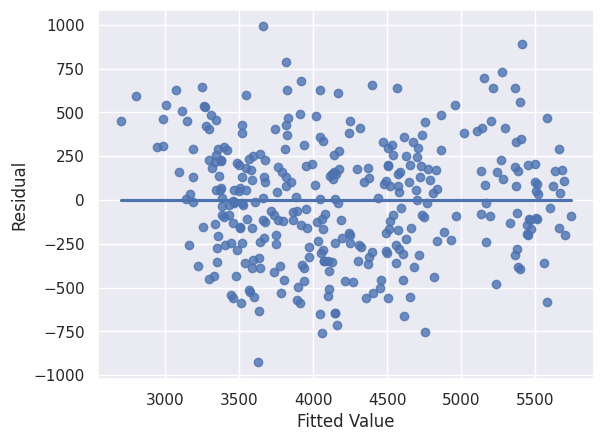

In [13]:
sns.regplot(x=linMod.fittedvalues, y=linMod.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

<u>**Condition 2**</u>: **Constant Variability of Residuals Condition** <br>
Since the y‑axis spread of points in the plot below stays similar as we move from left to right, we can say that this condition is met.

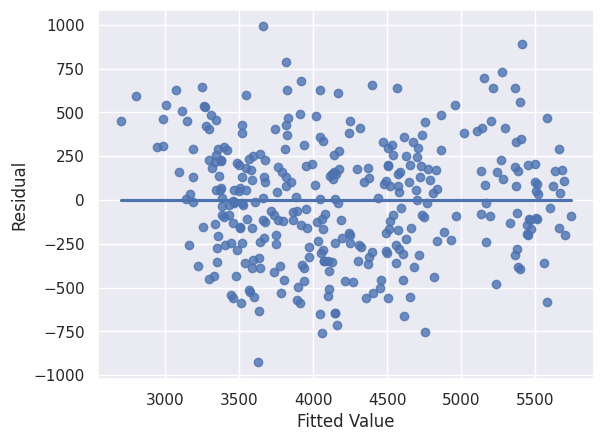

In [14]:
sns.regplot(x=linMod.fittedvalues, y=linMod.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

<u>**Condition 3**</u>: **Normality of Residuals Condition** <br>
Since the y‑axis spread of points in the plot below stays similar as we move from left to right, we can say that this condition is met.

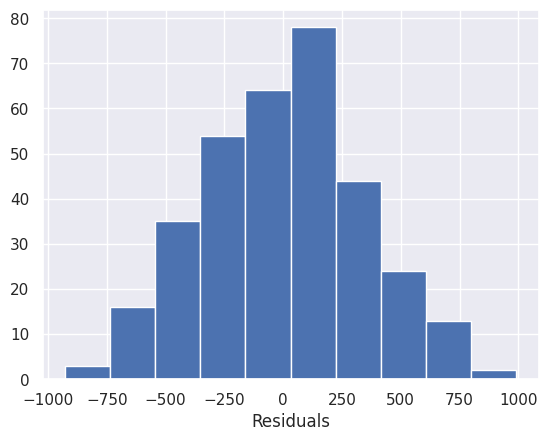

In [15]:
plt.hist(linMod.resid)
plt.xlabel('Residuals')
plt.show()

<u>**Condition 4**</u>: **Independence of Residuals Condition** <br>
The data is randomly sampled (as provided in the study) and the sample size n=333<10% of all Palmers Penguins.
Thus the condition for independence of residuals are valid.

In [16]:
print("Independence:", len(df), "< 10% of population size N")

Independence: 333 < 10% of population size N


<u>**Condition 5**</u>: **Multicollinearity Condition** <br>
The pairplots below show that the multicollinearity condition is not met, as there are multiple pairs of variables that are linearly associated.

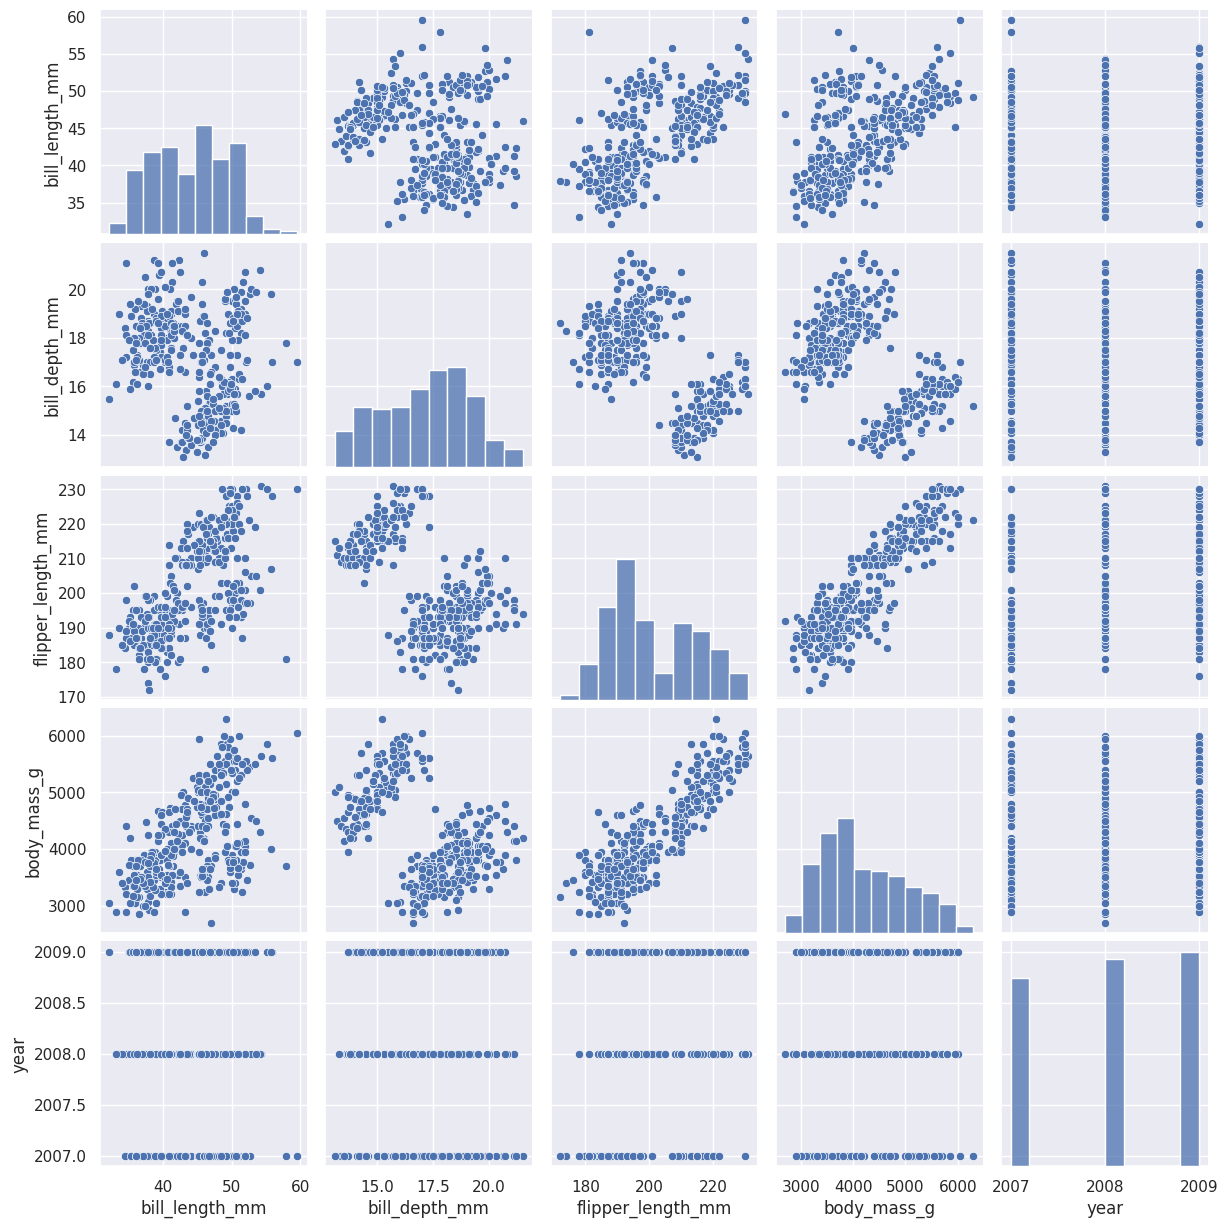

In [17]:
sns.pairplot(df)
plt.show()

We will try dropping an explanatory variable (flipper length) in order to help the model meet the multicollinearity condition.

In [18]:
linMod = smf.ols('body_mass_g ~ bill_length_mm + bill_depth_mm + sex', data=df).fit()
print(linMod.summary())
print("-----------")
print("Our Fitted Linear Regression Model: ")
print("yhat = 6551.4387 + 923.3052*sex + 36.5191*bill_length_mm - 257.3146*bill_depth_mm")

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     241.0
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.10e-82
Time:                        17:33:59   Log-Likelihood:                -2506.6
No. Observations:                 333   AIC:                             5021.
Df Residuals:                     329   BIC:                             5036.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6551.4387    394.408     16.

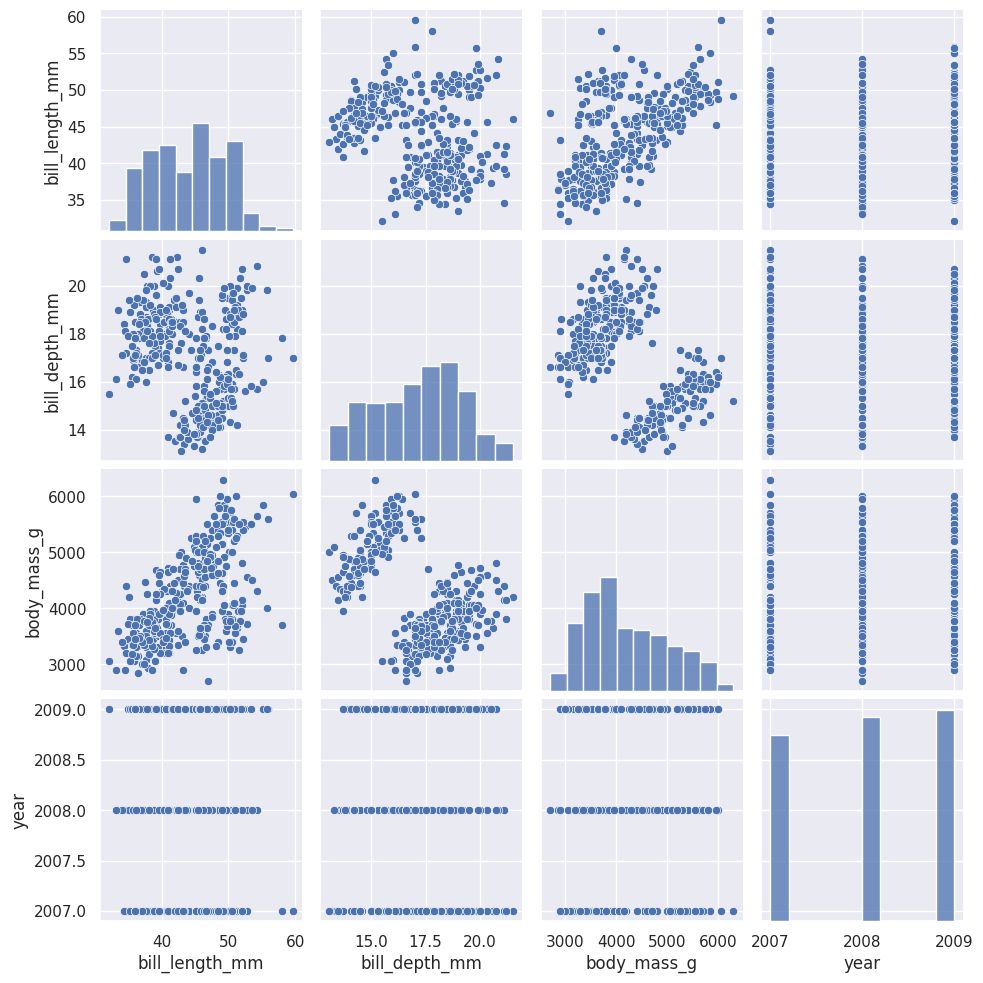

In [19]:
adj_df = df.drop(columns = ["flipper_length_mm"], axis=1)
sns.pairplot(adj_df)
plt.show()

After dropping explanatory variable flipper_length_mm, our multicollinearity condition is still not met, so we will continue to proceed with caution. 

<u>**Percent Variability**</u><br>
Our percent variability in body mass explained by the model is 0.687, denoted by the R-squared value, which is average. This means about 68.7% of the variation in body mass can be explained by its linear relationship with the predictor variables flipper length, bill length, bill depth, and sex.

<u>**Prediction**</u><br>
A male penguin studied in 2007 with bill length 40 and bill depth 18 has an estimated body mass of about 4303.845 grams.

In [20]:
linMod.predict(exog=dict(bill_length_mm=40, bill_depth_mm=18, year=2007, sex="male"))

0    4303.845058
dtype: float64

In [21]:
linMod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     241.0
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.10e-82
Time:                        17:34:02   Log-Likelihood:                -2506.6
No. Observations:                 333   AIC:                             5021.
Df Residuals:                     329   BIC:                             5036.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6551.4387    394.408     16.611      0.000    5775.559    7327.318
sex[T.male]      923.3052     60.723     15.205      0.000     803.850    1042.760
bill_length_mm    36.5191      5.300      6.891      0.000      26.093      46.945
bill_depth_mm   -257.3146     14.892    -17.278      0.000    -286.611    -228.019
==============================================================================
Omnibus:                        0.670   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.692
Skew:                          -0.108   Prob(JB):                        0.708
Kurtosis:                       2.942   Cond. No.                         759.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<u>**Which slopes in our model do we have sufficient evidence to suggest are non-zero in the population model?**</u><br>
Our assumptions for hypothesis testing are met for the following tests, since our multiple linear regression inference conditions hold, as shown previously. So we may proceed with valid interpretations and conclusions. We will conduct the following hypothesis tests at the a=0.05 signficance level for the respective slopes to determine which, if any, slopes in our model we have sufficient evidence to suggest are non-zero.

Testing the claim that the sex slope in the multiple linear regression model is non‑zero, we have the following hypothesis, where β<sub>sex</sub> is the population slope that corresponds to sex.
H<sub>0</sub>: β<sub>sex</sub> = 0
H<sub>a</sub>: β<sub>sex</sub> ≠ 0

Testing the claim that the bill length slope in the multiple linear regression model is non‑zero, we have the following hypothesis, where β<sub>blength</sub> is the population slope that corresponds to bill length.
H<sub>0</sub>: β<sub>blength</sub> = 0
H<sub>a</sub>: β<sub>blength</sub> ≠ 0

Testing the claim that the bill depth slope in the multiple linear regression model is non‑zero, we have the following hypothesis, where β<sub>bdepth</sub> is the population slope that corresponds to bill depth.
H<sub>0</sub>: β<sub>bdepth</sub> = 0
H<sub>a</sub>: β<sub>bdepth</sub> ≠ 0


In [22]:
point_estimate=923.3052
standard_error=60.723
null_value=0
test_stat=(point_estimate-null_value)/standard_error
print("[Sex Slope]")
print('Test Statistic:', test_stat)
pvalue=2*(1-t.cdf(np.abs(test_stat), df=329))
print('P-value:', pvalue)
print("------------")

point_estimate=36.5191
standard_error=5.300
null_value=0
test_stat=(point_estimate-null_value)/standard_error
print("[Bill Length Slope]")
print('Test Statistic:', test_stat)
pvalue=2*(1-t.cdf(np.abs(test_stat), df=329))
print('P-value:', pvalue)
print("------------")

point_estimate=-257.3146
standard_error=14.892
null_value=0
test_stat=(point_estimate-null_value)/standard_error
print("[Bill Depth Slope]")
print('Test Statistic:', test_stat)
pvalue=2*(1-t.cdf(np.abs(test_stat), df=329))
print('P-value:', pvalue)

[Sex Slope]
Test Statistic: 15.20519737167136
P-value: 0.0
------------
[Bill Length Slope]
Test Statistic: 6.890396226415095
P-value: 2.8419711028959682e-11
------------
[Bill Depth Slope]
Test Statistic: -17.278713403169487
P-value: 0.0


Regarding the sex slope, because the p-value (0.0) is less than the a=0.05 signifiance level, we reject the null. We have sufficient evidence to suggest that the sex slope in the multiple linear regression model is non‑zero.

Regarding the bill length slope, because the p-value (~2.84197) is greater than the a=0.05 signifiance level, we fail to reject the null. We do not have sufficient evidence to suggest that the sex slope in the multiple linear regression model is non‑zero.

Regarding the bill depth slope, because the p-value (0.0) is less than the a=0.05 signifiance level, we reject the null. We have sufficient evidence to suggest that the bill depth slope in the multiple linear regression model is non‑zero.

<u>**Conclusion - Linear Regression**</u><br>

Our linear regression analysis found that bill length, and bill depth, and sex were significant predictors of penguin body mass based on their respective t-values and p-values. For each variable, we found the following: <br>

Bill length: For each additional millimeter of bill length, we would expect an increase of 36.5191 grams in body mass, holding sex and bill depth constant. <br>
Bill depth: For each additional millimeter of bill depth, we would expect a decrease of 257.3146 grams in body mass, holding sex and bill length constant. <br>
Sex: Males were found to be significantly heavier than females, with an average weight difference of 923.3052 grams after controlling for bill length and bill depth. 

The sex and bill depth slopes were found to have sufficient evidence to suggest that their respective slopes in the multiple linear regression model are non-zero, indicating that they are significant predictors of body mass in the population model.

These findings help to answer our research question by providing evidence that bill length, bill depth, and sex are important predictors of penguin body mass. This suggests that those who want to estimate the body mass of penguins in the wild could use bill length, bill depth, and sex as reliable indicators of body mass. However, our analysis was conducted with caution, as our model did not fulfill the multicollinearity condition for linear regression. In addition, it is worth noting that our analysis was limited to Palmer penguins, and further research is needed to determine whether these findings generalize to other species or populations of penguins.


## 5. Logistic Regression

### Is there a linear relationship between the log odds of successfully determining the sex of a penguin with the penguin species, body mass, bill length and location?

With most species, there are many phenotypes that could indicate the animal’s sex. For example, with peacocks, the dull colored birds are females and the brightly colored ones. In this case, we are wondering if the size of the penguin, (based on the species, bill length, and body mass, and the island the penguin’s data was recorded in), can determine the sex of a particular penguin. To help make the calculations easier later on, we created a variable called is female that records Male penguins as 0 and Female penguins as 1. These specific variables were chosen as they each could be possible factors whether it be environmental or biological. But before performing the regression model, the following assumptions must be checked:

1. Independence of the observations

2. Linearity

3. Multicollinearity

Considering the above assumptions have been checked for the linear regression model, we will continue with caution, as there is still a variable that is highly correlated (flipper length). Thus, we can split the data into training and testing data.

In [23]:
from sklearn.model_selection import train_test_split

df['is_female']= df['sex'].map({'male':0,'female':1})

df_train, df_test = train_test_split(df, test_size=0.20, random_state=123)
df_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,is_female
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,0
214,Gentoo,Biscoe,45.7,13.9,214.0,4400.0,female,2008,1
97,Adelie,Dream,40.3,18.5,196.0,4350.0,male,2008,0
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007,1
204,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,female,2008,1
...,...,...,...,...,...,...,...,...,...
89,Adelie,Dream,38.9,18.8,190.0,3600.0,female,2008,1
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female,2007,1
238,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,female,2009,1
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female,2009,1


After dividing the data into training and testing, we can find the parsimonious model by using the BIC as a metric along with backwards elimination.

In [24]:
mod_full = smf.logit('is_female ~ species+bill_length_mm+body_mass_g+island', data=df_train).fit()
mod_red = smf.logit('is_female ~ bill_length_mm+body_mass_g', data=df_train).fit()

print('Full Model AIC:',mod_full.aic)
print('Reduced Model AIC:',mod_red.aic)
print('Full Model BIC:',mod_full.bic)
print('Reduced Model BIC:',mod_red.bic)

Optimization terminated successfully.
         Current function value: 0.214389
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.596216
         Iterations 5
Full Model AIC: 128.05514608944742
Reduced Model AIC: 323.18668821739135
Full Model BIC: 153.1396202509193
Reduced Model BIC: 333.93717714373645


In [25]:
current_mod=smf.logit('is_female ~ species+bill_length_mm+body_mass_g+island', data=df).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)
print('ITERATION 1: AIC of the Current Model',current_mod.aic)

Optimization terminated successfully.
         Current function value: 0.245168
         Iterations 9
ITERATION 1: BIC of the Current Model 203.9387839149123
ITERATION 1: AIC of the Current Model 177.2817864850492


In [26]:
# Iteration 1:
test_mod0=smf.logit('is_female ~ species+bill_length_mm+island', data=df).fit()
print('BIC of Test Model that Deletes BODY MASS from the Current Model',test_mod0.bic)

test_mod1=smf.logit('is_female ~ species+body_mass_g+island', data=df).fit()
print('BIC of Test Model that Deletes BILL LENGTH from the Current Model',test_mod1.bic)

test_mod2=smf.logit('is_female ~ bill_length_mm+body_mass_g+island', data=df).fit()
print('BIC of Test Model that Deletes SPECIES from the Current Model',test_mod2.bic)

test_mod3=smf.logit('is_female ~ species+bill_length_mm+body_mass_g', data=df).fit()
print('BIC of Test Model that Deletes ISLAND from the Current Model',test_mod3.bic)


#Iteration #2:
test_mod4=smf.logit('is_female ~ species+bill_length_mm+body_mass_g', data=df).fit()
print('BIC of Test Model that DELETED ISLAND from the First Iteration Model',test_mod4.bic)

test_mod5=smf.logit('is_female ~ species+bill_length_mm', data=df).fit()
print('BIC of Test Model that Deletes BODY MASS from the First Iteration Model',test_mod5.bic)

test_mod6=smf.logit('is_female ~ species+body_mass_g', data=df).fit()
print('BIC of Test Model that Deletes BILL LENGTH from the First Iteration Model',test_mod6.bic)

test_mod7=smf.logit('is_female ~ bill_length_mm+body_mass_g', data=df).fit()
print('BIC of Test Model that Deletes SPECIES from the First Iteration Model',test_mod7.bic)

Optimization terminated successfully.
         Current function value: 0.437483
         Iterations 7
BIC of Test Model that Deletes BODY MASS from the Current Model 326.2126765196796
Optimization terminated successfully.
         Current function value: 0.317263
         Iterations 8
BIC of Test Model that Deletes BILL LENGTH from the Current Model 246.14634230710138
Optimization terminated successfully.
         Current function value: 0.517618
         Iterations 6
BIC of Test Model that Deletes SPECIES from the Current Model 373.77423824549794
Optimization terminated successfully.
         Current function value: 0.245921
         Iterations 9
BIC of Test Model that Deletes ISLAND from the Current Model 192.82430601479336
Optimization terminated successfully.
         Current function value: 0.245921
         Iterations 9
BIC of Test Model that DELETED ISLAND from the First Iteration Model 192.82430601479336
Optimization terminated successfully.
         Current function value: 0.4

In [27]:
print('Final Model:', 'is_female ~ species+bill_length_mm+body_mass_g','BIC:',test_mod4.bic)
train_mod = smf.logit('is_female ~ species+bill_length_mm+body_mass_g', data=df_train).fit()
train_mod.summary()

Final Model: is_female ~ species+bill_length_mm+body_mass_g BIC: 192.82430601479336
Optimization terminated successfully.
         Current function value: 0.214507
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              is_female   No. Observations:                  266
Model:                          Logit   Df Residuals:                      261
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.6902
Time:                        17:34:02   Log-Likelihood:                -57.059
converged:                       True   LL-Null:                       -184.19
Covariance Type:            nonrobust   LLR p-value:                 7.865e-54
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               57.6736      8.219      7.017      0.000      41.564      73.783
species[T.Chinstrap]     8.2612      1.617      5.110      0.000       5.093      11.429
species[T.Gentoo]       17.3118      2.423      7.146      0.000      12.564      22.060
bill_length_mm          -0.8011      0.147     -5.452      0.000      -1.089      -0.513
body_mass_g             -0.0072      0.001     -6.190      0.000      -0.010      -0.005
========================================================================================
"""

After conducting the elimination process, the variables that are the most influential are bill length, species, and body mass to determining the log odds of the sex of a penguin and thus the fitted model is the following:

log(p/1-p) = 57.6736 +  8.2612(species[T.Chinstrap])+ 17.3118(species[T.Gentoo]) - 0.8011(bill_length_mm) - 0.0072(body_mass_g)

With this equation, we can look at the p-values or the confidence intervals to see if any are non-zero. Since all the p-values are or very close to 0 and 0 does not lie in any of the intervals, we can assume that all the slopes are all non-zero. 

Now we can create an ROC Curve and examine how well the model fits the data:

Optimization terminated successfully.
         Current function value: 0.275557
         Iterations 8


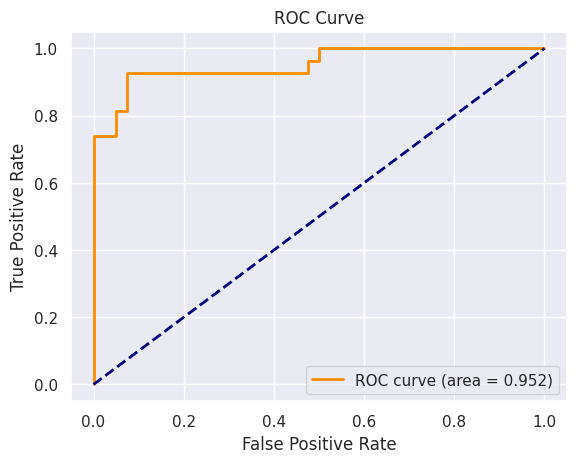

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

final_testmod = smf.logit('is_female ~ species+bill_length_mm+body_mass_g', data=df_test).fit()

phat_test = final_testmod.predict(exog=df_test[['species', 'body_mass_g', 'bill_length_mm']])
df_test['phat_test']=phat_test
df_test

fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_test['is_female'], y_score=df_test['phat_test'])
auc_pew = roc_auc_score(y_true=df_test['is_female'], y_score=df_test['phat_test'])
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc(fpr_pew, tpr_pew, auc_pew)

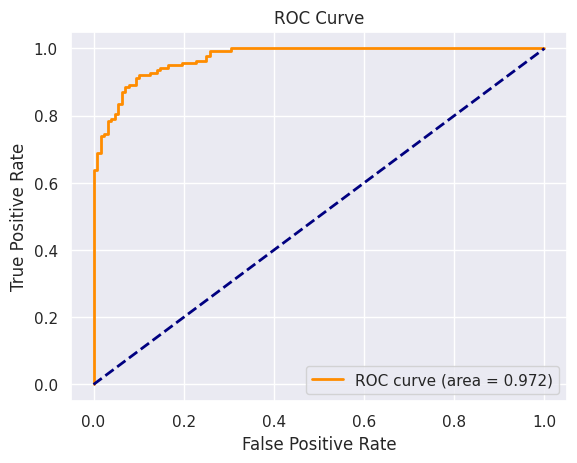

In [29]:
phat_train = train_mod.predict(exog=df_train[['species', 'body_mass_g', 'bill_length_mm']])
df_train['phat_train']= phat_train


fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_train['is_female'], y_score=df_train['phat_train'])
auc_pew = roc_auc_score(y_true=df_train['is_female'], y_score=df_train['phat_train'])
plot_roc(fpr_pew, tpr_pew, auc_pew)

In [30]:
# for thresh in np.arange(0,1,.01):
#     print(tpr_fpr_thresh(df_test['is_female'], df_test['phat_test'], thresh))

In [31]:
from sklearn.metrics import confusion_matrix

def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})


tpr_fpr_thresh(df_test['is_female'], df_test['phat_test'], 0.5)



,threshold,tpr,fpr
0,0.5,0.888889,0.075


As shown above, the first curve was created with the testing data and the second curve with the training data. As you can see by the AUC values of the respective curves, the model is a very good fit for the data. Examining the thresholds at every 0.01 increment from 0 to 1, they produce a very high true positive rate and low false positive rate (which is beneficial), so a good probability threshold for the testing data would be 0.5. Thus, we decided to use the common threshold of 0.5, which yields a true positive rate of about 0.851 and a false positive rate of about 0.2.

In [32]:
pred_probabilities=final_testmod.predict(exog=dict(df_test)) 
df_test['predictive_prob']=pred_probabilities
df_test['yhat']=1*(df_test['predictive_prob']>0.5)
df_test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,is_female,phat_test,predictive_prob,yhat
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,male,2009,0,0.000062,0.000062,0
158,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,female,2007,1,0.717068,0.717068,1
291,Chinstrap,Dream,50.5,19.6,201.0,4050.0,male,2007,0,0.081194,0.081194,0
311,Chinstrap,Dream,47.5,16.8,199.0,3900.0,female,2008,1,0.457911,0.457911,0
186,Gentoo,Biscoe,49.1,14.8,220.0,5150.0,female,2008,1,0.046812,0.046812,0
...,...,...,...,...,...,...,...,...,...,...,...,...
177,Gentoo,Biscoe,46.1,15.1,215.0,5100.0,male,2007,0,0.188643,0.188643,0
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007,1,0.887501,0.887501,1
61,Adelie,Biscoe,41.3,21.1,195.0,4400.0,male,2008,0,0.001423,0.001423,0
35,Adelie,Dream,39.2,21.1,196.0,4150.0,male,2007,0,0.018813,0.018813,0


In [33]:
tn, fp, fn, tp = confusion_matrix(y_true=df_test['is_female'], 
                                  y_pred=df_test['yhat']).ravel()
(tn, fp, fn, tp)

(37, 3, 3, 24)

In [34]:
specificity_class=tn/(tn+fp)
sensitivity_class=tp/(tp+fn)
fpr_class=fp/(tn+fp)
tpr_class = tp/(tp+fn)
(sensitivity_class, specificity_class,fpr_class)

(0.8888888888888888, 0.925, 0.075)

After using the probability threshold of 0.5, we classified the data and got a specificity of about 0.89, a sensitivity of 0.925, and a false positive rate of 0.075. What this means in relation to our research is that about 89% of the time, the model correctly identifies a penguin as male and about 92% of the time, the model is able to correctly identify a penguin as female, and very rarely does the model misidentify a male penguin as female.

<u>**Conclusion - Logistic Regression**</u><br>

Our final logistic regression model does extremely well of identifying a linear relationship between the log odds of a  penguin's sex based on the species, bill length, and body mass as it has really high specificity and sentivity rates and a very low false positive rate. However, it means that the Island variable, which we initially thought would factor into the penguin's sex, had no significance at all.


## 6. Conclusion

The Gentoo, Adelies, and Chinstraps all had different distributions of flipper length that changed yearly. The Gentoo had the highest median flipper length across 3 years, while the Adelies had the smallest. However, the Adelies had the largest increase in median flipper length compared to the other two species.

The sizeable change in flipper length was further explored in the inference section, where a hypothesis test for difference in mean flipper length between the 2007 Adelie population and the 2009 Adelie population at alpha = 0.5 showed that there was indeed a statistically significant difference between the two populations. 

In addition, our multiple linear regression model using bill length, and bill depth, and sex was found to be a good predictor of penguin body mass. However, our analysis was conducted with caution, as our model did not fulfill the multicollinearity condition for linear regression.

Additionally, a logistic model was created to be used to predict the sex of a penguin. The variables initially thought to play a factor were body mass, bill length, location in the archipelago, and species type. Although the location variable was proven to be an unhelpful variable in the model, the remaining 3 variables create a logisic regression model that is higly accurate (the ROC curve has an AUC score of about 0.95) in determining the log odds of a penguin's sex based on bill length, species and body mass.

For future research, the inclusion of more variables such as height, wingspan, season may provide information that could make our linear regression model more reliable. With the inclusion of other possible datasets, future work could also be conducted with the comparison of our physical penguin characteristic changes to environmental factors such as pollution, resource scarcity, climate change, etc.  Furthermore, the addition of more penguin species could allow us to expand our scope beyond Palmer Station and onto the greater Antarctic region.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0dc9bc1-4e70-4eb9-9c73-495969c2015c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>